#**SkinTone Analysis**

In [ ]:
import pickle

In [ ]:
! pip install skin-tone-classifier --upgrade
!pip install colorgram.py

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.5/116.5 kB 12.7 MB/s eta 0:00:00
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39406 sha256=5da9173c9352f6814bd3bd9446a46d173610802f6bd3dfe5f6265841512fde91
  Stored in directory: /root/.cache/pip/wheels/ab/b3/4d/c0738759c25a1df01958068f162cf2a9dc3ab1da8b972cfcfc
Successfully built colormath


In [ ]:
from IPython.display import Image
import stone
from google.colab.patches import cv2_imshow
from json import dumps # Optional
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io, color

import colorgram
import numpy as np

In [ ]:
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow

uploaded = files.upload()
for fn in uploaded.keys():
  path=fn

Saving mypassportsizephoto.jpg to mypassportsizephoto.jpg


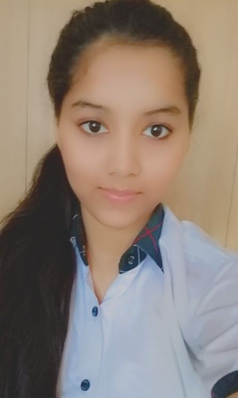

In [ ]:
image_path = path
image = cv2.imread(image_path)
scale_percent = 50  # Percentage of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
resized_image = cv2.resize(image, dim)
cv2_imshow(resized_image)

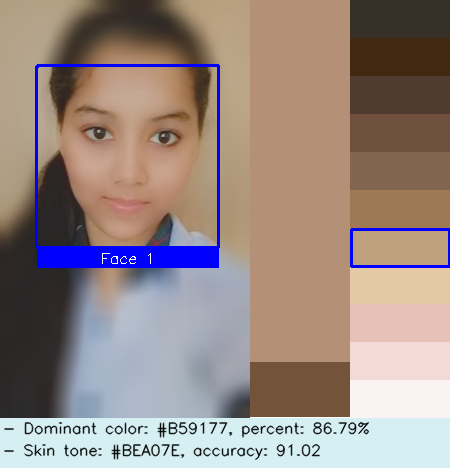

In [ ]:
result = stone.process(image_path, image_type="color", return_report_image=True)
report_images = result.pop("report_images")

face_id = 1
cv2_imshow(report_images[face_id])


In [ ]:
result_json = dumps(result)
result_json

'{"basename": "mypassportsizephoto", "extension": ".jpg", "image_type": "color", "faces": [{"dominant_colors": [{"color": "#B59177", "percent": "0.87"}, {"color": "#74543B", "percent": "0.13"}], "skin_tone": "#BEA07E", "tone_label": "CG", "accuracy": 91.02, "face_id": 1}]}'

In [ ]:
! stone -i {image_path}  --debug


The program is processing your images...
Please wait for the program to finish.
Processing mypassportsizephoto: 100% 1/1 [00:00<00:00,  5.89images/s, Image Type=bw, #Faces=1, Face ID=1, Skin Tone=#909090, Label=BH, Accuracy=83.8]


In [ ]:
!ls

debug  log  mypassportsizephoto.jpg  result.csv  sample_data


In [ ]:
data=pd.read_csv("./result.csv")
data

,file,image type,face id,dominant 1,percent 1,dominant 2,percent 2,skin tone,tone label,accuracy(0-100)
0,mypassportsizephoto.jpg,bw,1,#B6947C,0.82,#8D694E,0.18,#909090,BH,83.81


Skin Type

Type 1: Fair: Pale or porcelain skin.
Type 2: Light: Slightly tanned or peach undertones
Type 3: Medium/Olive: Warm or yellow undertones.
Type 4: Tan: Deeper, sun-kissed tones
Type 5: Brown/Dark Brown: Rich, chocolate tones.
Type 6: Black Skin

In [ ]:
def hex_to_skin_tone(hex_color):
    """Converts a hex color code to a skin tone category.

    Args:
        hex_color (str): The hex color code (e.g., "#9D7A54").

    Returns:
        str: The skin tone category (e.g., "Type 1", "Type 2", etc.).
    """

    # Remove the '#' if present
    hex_color = hex_color.lstrip("#")

    # Convert hex to RGB
    r, g, b = tuple(int(hex_color[i:i + 2], 16) for i in (0, 2, 4))

    # Define skin tone ranges based on RGB values (adjust as needed)
    if r > 230 and g > 200 and b > 180:
        return "Type 1"  # Very Fair or Extremely Fair Skin
    elif r > 200 and g > 170 and b > 140:
        return "Type 2"  # Fair Skin
    elif r > 170 and g > 140 and b > 110:
        return "Type 3"  # Medium Skin
    elif r > 140 and g > 110 and b > 80:
        return "Type 4"  # Olive or Light Brown Skin
    elif r > 110 and g > 80 and b > 50:
        return "Type 5"  # Brown Skin
    else:
        return "Type 6"  # Black Skin

# Example usage:
# Apply the function to each element in the 'skin tone' column
data["skin_tone_category"] = data["skin tone"].apply(hex_to_skin_tone)

# Print the updated DataFrame
print(data)

                      file image type  face id dominant 1  percent 1  \
0  mypassportsizephoto.jpg         bw        1    #B6947C       0.82   

  dominant 2  percent 2 skin tone tone label  accuracy(0-100)  \
0    #8D694E       0.18   #909090         BH            83.81   

  skin_tone_category  
0             Type 4  


In [ ]:
skin_type={"Type 1":"Very Fair or Extremely Fair Skin","Type 2":"Fair Skin","Type 3":"Medium Skin","Type 4":"Olive or Light Brown","Type 5":"Brown Skin","Type 6":"Black Skin"}
data["skin_tone_type"]=data["skin_tone_category"].map(skin_type)
skin_tone_category = data["skin_tone_category"].iloc[0]
skin_tone_type = data["skin_tone_type"].iloc[0]
def recommend_colors(skin_tone_type):
    if skin_tone_type == "Type 1":
        return ["Pastel Pink", "Light Blue", "Lavender", "Light Gray", "Soft White", "Icy Blue"]
    elif skin_tone_type == "Type 2":
        return ["LightPink", "LightCoral", "PowderBlue", "PaleGreen", "LightSalmon", "PeachPuff"]  # Using color names
    elif skin_tone_type == "Type 3":
        return ["Goldenrod", "DarkOliveGreen", "RoyalBlue", "Sienna", "Peru", "DarkKhaki"]  # Using color names
    elif skin_tone_type == "Type 4":
        return ["OliveDrab", "DarkGoldenrod", "Chocolate", "SaddleBrown", "DarkOrange", "FireBrick"]  # Using color names
    elif skin_tone_type == "Type 5":
        return ["Maroon", "DarkRed", "Indigo", "Purple", "DarkSlateGray", "SaddleBrown"]  # Using color names
    elif skin_tone_type == "Type 6":
        return ["Fuchsia", "DarkMagenta", "Navy", "MidnightBlue", "DarkViolet", "DarkSlateBlue"]  # Using color names
    else:
        return ["N/A"]

In [ ]:
def recommend_colors_tone(skin_tone_type):
    if skin_tone_type == "Warm":
        return ["coral", "lightsalmon", "olivedrab", "gold", "firebrick"]  # Changed colors
    elif skin_tone_type == "Cool":
        return ["lavender", "blue", "seagreen", "silver", "fuchsia"]  # Changed colors
    else:
        return ["N/A"]

In [ ]:
#Color Recommendation System

def analyze_image_tone(image_path):
    """Analyzes an image to determine its color tone (warm or cool).

    Args:
        image_path: Path to the image file.

    Returns:
        "Warm" or "Cool" based on the dominant color tone.
    """

    # Extract dominant colors using colorgram.py
    colors = colorgram.extract(image_path, 6)  # Extract 6 most dominant colors

    # Calculate average RGB values for the dominant colors
    avg_r = np.mean([color.rgb.r for color in colors])
    avg_g = np.mean([color.rgb.g for color in colors])
    avg_b = np.mean([color.rgb.b for color in colors])

    # Determine color tone based on RGB values
    if avg_r > avg_b:  # More red than blue indicates a warm tone
        return "Warm"
    else:
        return "Cool"

# Example usage:
image_path = "/content/mypassportsizephoto.jpg"  # Replace with your image path
color_tone = analyze_image_tone(image_path)
data["color_tone"]=color_tone
print(f"The image has a {color_tone} color tone.")

The image has a Warm color tone.


In [ ]:
def ultimate_color_recommendations(skin_tone_type, image_path):
    # Get recommendations based on skin tone category
    skin_tone_colors = recommend_colors(skin_tone_category)

    # Get image color tone
    image_tone = analyze_image_tone(image_path)

    # Filter recommendations based on image tone
    if image_tone == "Warm":
        # Filter for warm colors (example: colors with higher red values)
        ultimate_colors = [
            color for color in skin_tone_colors
            if any(c in color.lower() for c in ["red", "orange", "yellow", "gold", "coral", "peach"])  # Example warm color keywords
        ]
    else:  # image_tone == "Cool"
        # Filter for cool colors (example: colors with higher blue values)
        ultimate_colors = [
            color for color in skin_tone_colors
            if any(c in color.lower() for c in ["blue", "green", "purple", "lavender", "gray", "silver"])  # Example cool color keywords
        ]

    return ultimate_colors

# Example usage:
skin_tone_type = "Type 4"  # Replace with the actual skin tone type
image_path = "/content/mypassportsizephoto.jpg"  # Replace with your image path

ultimate_recommendations = ultimate_color_recommendations(skin_tone_type, image_path)


In [ ]:
image = io.imread("/content/mypassportsizephoto.jpg")
hsv_image = color.rgb2hsv(image)  # Convert to HSV color space
color_histogram = np.histogram(hsv_image[:, :, 0], bins=256)  # Hue histogram

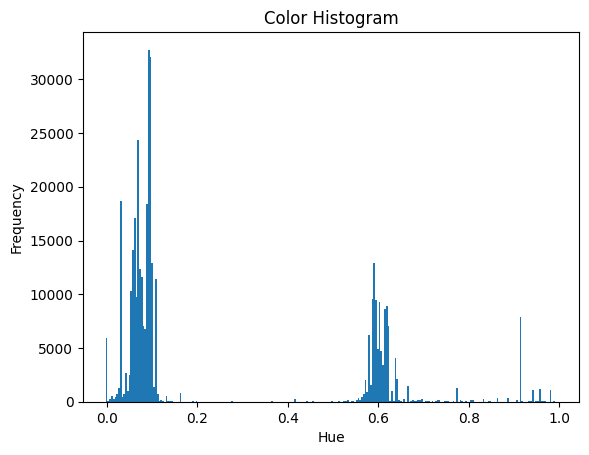

In [ ]:
import matplotlib.pyplot as plt

# Assuming color_histogram is the tuple returned by np.histogram
hist_values, bin_edges = color_histogram  # Unpack the tuple

plt.bar(bin_edges[:-1], hist_values, width=bin_edges[1] - bin_edges[0])
# or
# plt.hist(hsv_image[:, :, 0].flatten(), bins=256) # Directly plot the histogram

plt.title("Color Histogram")
plt.xlabel("Hue")
plt.ylabel("Frequency")
plt.show()

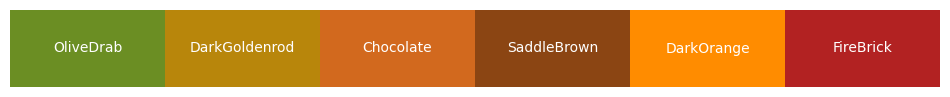

In [ ]:
def show_colors(colors):
    fig, ax = plt.subplots(figsize=(len(colors)*2, 1))
    ax.set_xlim(0, len(colors))
    ax.set_ylim(0, 1)
    ax.set_axis_off()

    for i, color in enumerate(colors):
        rect = patches.Rectangle((i, 0), 1, 1, facecolor=color)
        ax.add_patch(rect)
        ax.text(i + 0.5, 0.5, color, ha='center', va='center', color='white')

    plt.show()

# Get skin tone category (example)
skin_tone_category = data["skin_tone_category"].iloc[0]

# Get recommended colors
recommended_colors = recommend_colors(skin_tone_category)

# Display colors with names
show_colors(recommended_colors)

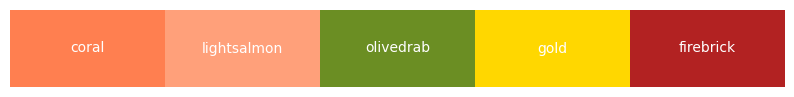

In [ ]:
show_colors(recommend_colors_tone(color_tone))

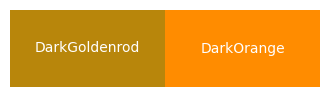

In [ ]:
show_colors(ultimate_recommendations)

In [ ]:
data["color_tone"]=data["color_tone"].map({"Warm":"Warm","Cool":"Cool"}).iloc[0]
ultimate_recommendations_str = ', '.join(ultimate_recommendations)
data["Ultimate Color Recommendations"] = [ultimate_recommendations_str]
print(f"Skintone Category: {skin_tone_category}")
print(f"Skintone Type: {skin_tone_type}")
print(f"Color Recommendation are",recommend_colors(skin_tone_category))
print(f"Color Tone :",{color_tone})
print(f"Color Recommendation are",recommend_colors_tone(color_tone))
print("Ultimate Color Recommendations:", ultimate_recommendations)

Skintone Category: Type 4
Skintone Type: Type 4
Color Recommendation are ['OliveDrab', 'DarkGoldenrod', 'Chocolate', 'SaddleBrown', 'DarkOrange', 'FireBrick']
Color Tone : {'Warm'}
Color Recommendation are ['coral', 'lightsalmon', 'olivedrab', 'gold', 'firebrick']
Ultimate Color Recommendations: ['DarkGoldenrod', 'DarkOrange']
